TASK 2

Boston Housing Prices

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

DATASET LOADING AND DESCRIPTION

In [2]:
boston_data = load_boston()
print(boston_data["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

A GLIMPSE OF THE DATASET

In [3]:
x = boston_data.data
y = boston_data.target
data = pd.DataFrame(x, columns = boston_data.feature_names)
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


DATA DESCRIPTION

In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [5]:
data_with_target = data
data_with_target["MEDV"] = boston_data.target
data_with_target.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


CHECKING FOR MISSING VALUES

In [6]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

It can be observed that there are no missing values. Hence there is no need for filling empty values.

CHECKING FOR OUTLIERS

c:\Users\Sachi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


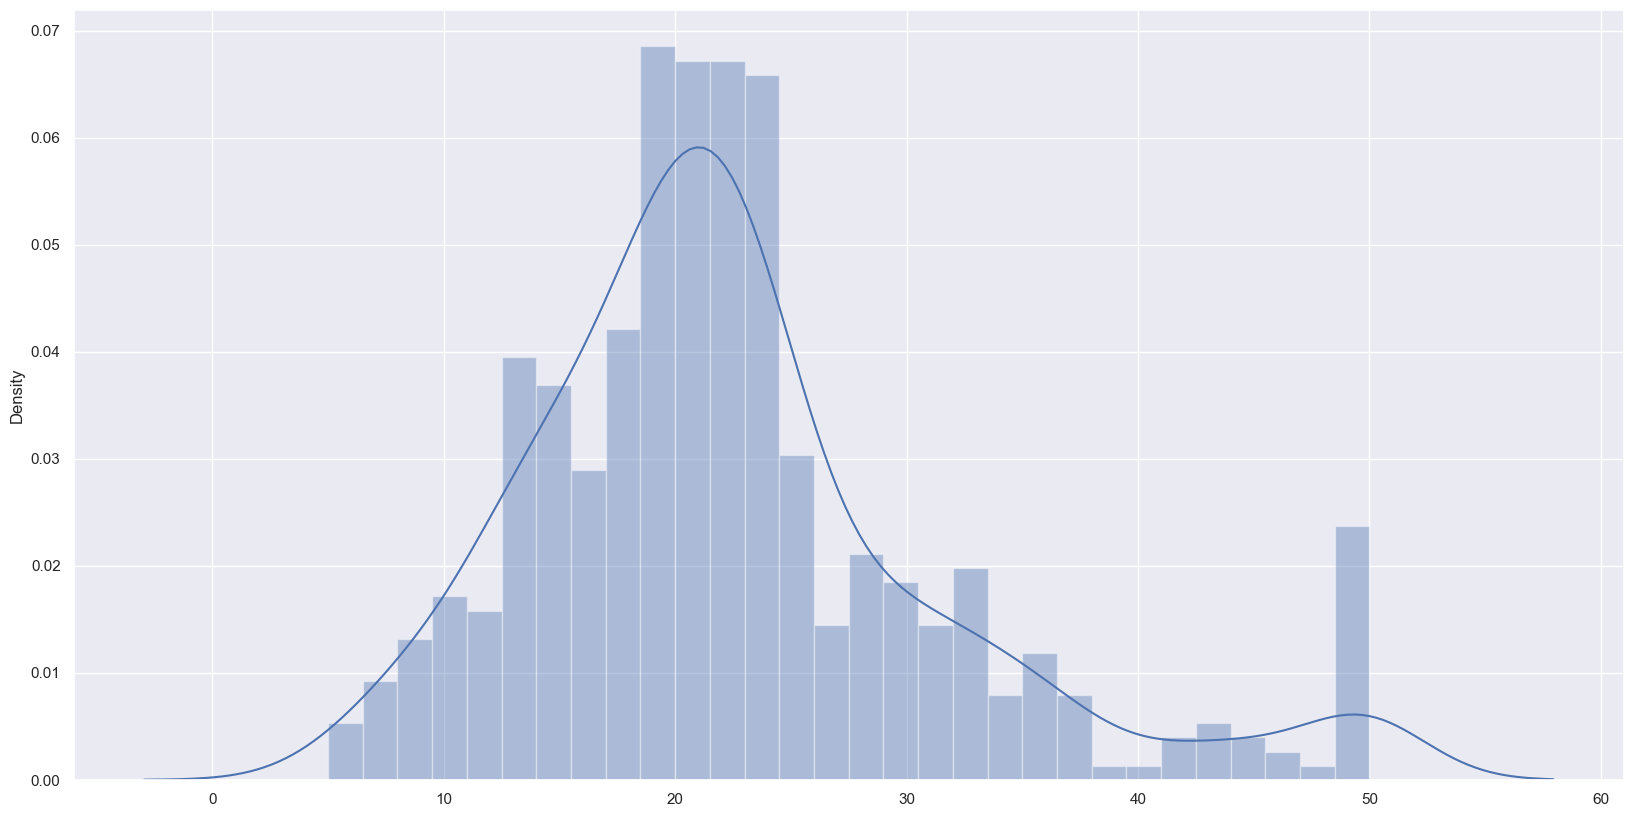

In [7]:
sns.set(rc={'figure.figsize':(20,10)})
sns.distplot(boston_data.target, bins=30)
plt.show()

THE CORRELATION MATRIX

<AxesSubplot: >

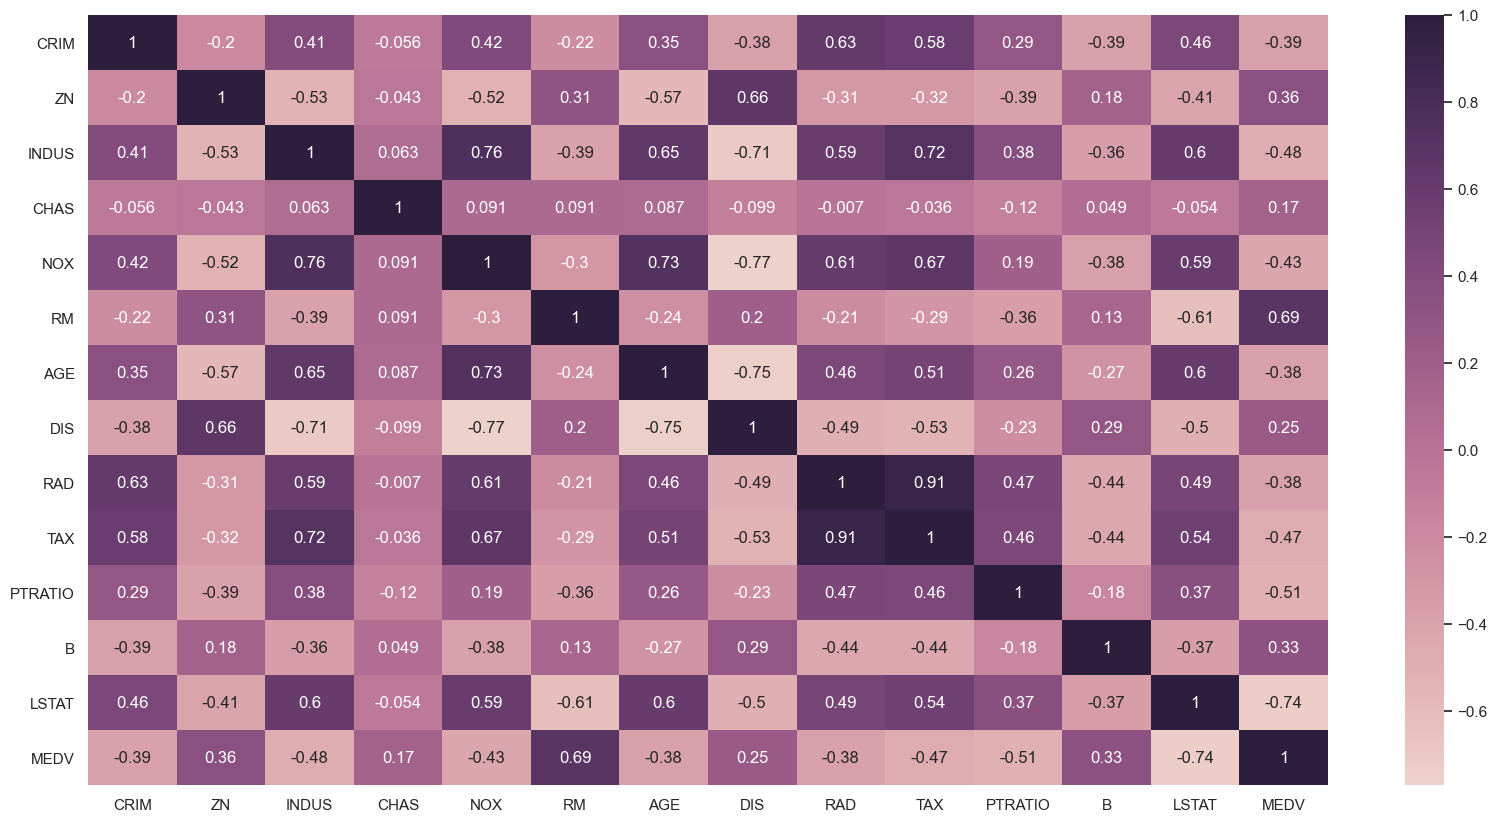

In [8]:
corr_matrix = data_with_target.corr().round(3)
sns.color_palette("deep")
sns.heatmap(data = corr_matrix, annot = True, cmap=sns.cubehelix_palette(as_cmap=True))
#sns.color_palette("bright")

It can be observed that RM has the highest positive correlation while LSTAT has highest negative correlation with the target i.e., MEDV.

SCATTER PLOT FOR MEDV v/s RM AND MEDV v/s LSTAT

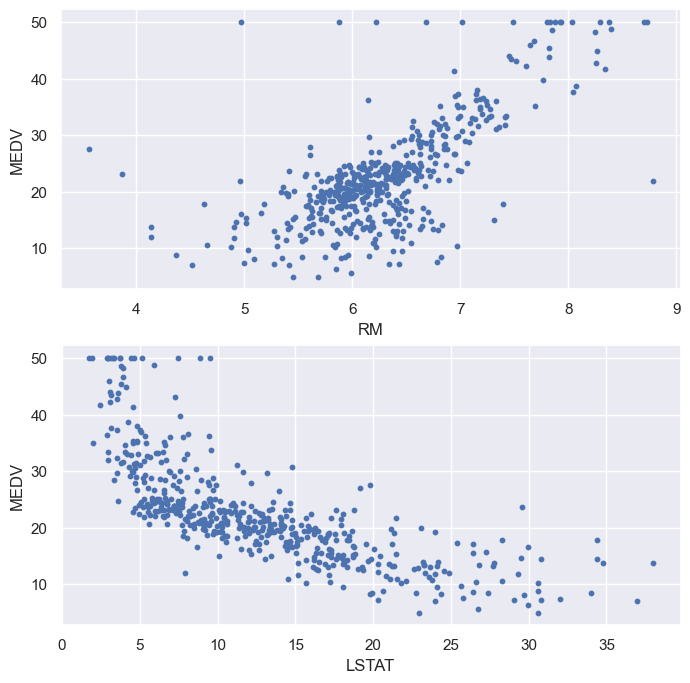

In [9]:
plt.figure(figsize=(8,8))

feats = ["RM", "LSTAT"]

for i, nam in enumerate(feats):
    plt.subplot(2,1,i+1)
    plt.scatter(data[nam], boston_data.target, marker= "o", s=10)
    plt.xlabel(nam)
    plt.ylabel("MEDV")
plt.show()

TRAINING THE MODEL

In [10]:
x_set = pd.DataFrame(np.c_[data_with_target["LSTAT"],data_with_target["RM"]], columns = ["LSTAT", "RM"])
y_set = data_with_target["MEDV"]

x_train, x_test, y_train, y_test = train_test_split(x_set,y_set,train_size=0.8, random_state=2)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

MODEL SCORE

In [11]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

print("Training set score is: {}".format(train_score))
print("Testing set score is: {}".format(test_score))

Training set score is: 0.618161707970275
Testing set score is: 0.7175039832076544


FOR USERS

In [1]:
from tkinter import *
from tkinter.constants import W,E
from tkinter import messagebox

main = Tk()
main.geometry("760x500")
main.title("Boston House Prediction")

for i in range(100):
    Label(main, text="          ").grid(row=i,column=1)


Label(main, text="PREDICT YOUR BOSTON HOUSE PRICE HERE!", fg="#009E60", font= ("Cambria bold", 24)).grid(row=2,column=2, columnspan=3)
Label(main, text="Enter your preferred no. of rooms (Integer value): ",font=("Segoe UI",12),width=40).grid(row=5,column=2,sticky=W)
Label(main, text="Enter your expected percentage of low status \npopulation (Decimal value): ",font=("Segoe UI",12),width=40).grid(row=7,column=2,rowspan=2,sticky=W)
Label(main, text="Pricing is* : ", font=("Cambria",16), fg="#008080").grid(row=14,column=2,rowspan=2)
Label(main, text="*These values are approx. 70% correct", fg="#FF0000", font=("Times New Roman", 9)).grid(row=18,column=4,sticky=E)

result = Label(main, text= "\t\t", font=("Segoe UI", 16),bg="#1FCECB",fg="#000000",width=25)
result.grid(row=14,column=3,columnspan=2,rowspan=2)

rm_var = IntVar()
lstat_var = DoubleVar()

rm = Entry(main, width=20, textvariable=rm_var)
rm.grid(row=5,column=3,columnspan=2)
lstat = Entry(main, width=20, textvariable=lstat_var)
lstat.grid(row=7,column=3,rowspan=2,columnspan=2)

def enter_action():
    try:
        rm_val = rm_var.get()
        lstat_val = lstat_var.get()
    except:
        messagebox.showinfo("Error", "Please enter proper values!")

    if rm_val == 0 or lstat_val== 0.0:
        res = "\t"

    else:
        price_check = np.array([[lstat_val,rm_val]])
        res = model.predict(price_check)
        res = res.round(4)*1000
        res = "$ {}".format(res[0])

    result["text"] = res
    main.update()

enter_button = Button(main, text="Check Price", width=15, bg="#AAF0D1", command=enter_action,font=("Times New Roman",14)).grid(row=11,column=2,columnspan=3)

main.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Sachi\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Users\Sachi\AppData\Local\Temp\ipykernel_23300\2688612375.py", line 41, in enter_action
    price_check = np.array([[lstat_val,rm_val]])
NameError: name 'np' is not defined
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Sachi\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Users\Sachi\AppData\Local\Temp\ipykernel_23300\2688612375.py", line 41, in enter_action
    price_check = np.array([[lstat_val,rm_val]])
NameError: name 'np' is not defined
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Sachi\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Users\Sachi\AppData\Local\Temp\ipykernel_23300\2688612375.py", line 41, in enter_action
    pric